In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_predict

In [2]:
data, target = load_svmlight_file("E2006.train")

## 1. Linear regression

In [3]:
# Linear regression

#1. model creation
lr = linear_model.LinearRegression()

#2. Model fitting
lr.fit(data, target)

#3. prediction
data_prediction = lr.predict(data)

In [4]:
#RMSE
rmse_train = np.sqrt(mean_squared_error(target, data_prediction))

print("RMSE = ", rmse_train)

RMSE =  0.002383011268234676


### K-Fold evaluation

In [5]:
# R2
r2_train = r2_score(target, data_prediction)

print("R2 = ", r2_train)

R2 =  0.9999857951855888


In [6]:
#KFold object creation
kf = KFold(n_splits = 5)

#KFold prediction
target_prediction = cross_val_predict(lr, data, target, cv = kf)

In [7]:
#RMSE
rmse_cv = np.sqrt(mean_squared_error(target_prediction, target))
print("RMSE on 5-fold cross validation = ", rmse_cv)
#R2
r2 = r2_score(target, target_prediction)
print("R2 = ", r2)

RMSE on 5-fold cross validation =  0.7548280032407355
R2 =  -0.42521170109861295


Sometimes performing a cross validation it is not the best option, as it can overfit our model and make it worse.

## 2. ElasticNet

In [8]:
# ElasticNet
# 1. Model creation
enet = linear_model.ElasticNet(alpha = 0.1)

# 2. Model fitting
enet.fit(data, target)

# 3. model prediction
enet_prediction = enet.predict(data)

In [9]:
# RMSE
rmse_enet_train = np.sqrt(mean_squared_error(target, enet_prediction))
print("RMSE = ", rmse_enet_train)

# R2
r2_enet_train = r2_score(target, enet_prediction)
print("R2 = ", r2_enet_train)

RMSE =  0.3966554650536713
R2 =  0.6064406300246878


### K-Fold evaluation

In [10]:
#usar KFold para hacer un mejor entrenamiento del modelo

#KFold object creation
kf = KFold(n_splits = 5)

#KFold prediction
e2006_target_prediction = cross_val_predict(enet, data, target, cv = kf)


In [11]:
#RMSE
rmse_cv = np.sqrt(mean_squared_error(e2006_target_prediction, target))
print("RMSE on 5-fold cross validation = ", rmse_cv)

# R2
r2_enet_train = r2_score(target, e2006_target_prediction)
print("R2 = ", r2_enet_train)

RMSE on 5-fold cross validation =  0.3967420770053747
R2 =  0.6062687394562409


La regularización permite que nuestro modelo alcance una mayor generalización

## 3. ElasticNet CV

In [12]:
encv = linear_model.ElasticNetCV(alphas = (0.1, 0.01, 0.005, 0.0025, 0.001), 
                                 l1_ratio=(0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99), 
                                 normalize=True)

encv.fit(data, target)

ElasticNetCV(alphas=(0.1, 0.01, 0.005, 0.0025, 0.001), copy_X=True, cv=None,
       eps=0.001, fit_intercept=True,
       l1_ratio=(0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99), max_iter=1000,
       n_alphas=100, n_jobs=1, normalize=True, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [13]:
encv.alpha_

0.001

In [14]:
encv.l1_ratio_

0.99

## 4. Visualization

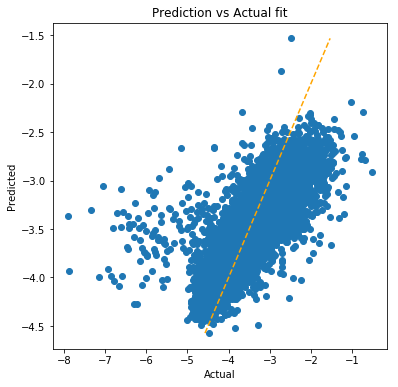

In [20]:
#Prediction vs Actual value
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(target, e2006_target_prediction)
ax.set_title("Prediction vs Actual fit")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.plot([e2006_target_prediction.min(), e2006_target_prediction.max()], [e2006_target_prediction.min(), e2006_target_prediction.max()], "--", color = "orange")
plt.show()